In [1]:
import stanza
import graphviz

import networkx as nx

from tuw_nlp.grammar.text_to_4lang import TextTo4lang
from tuw_nlp.graph.fourlang import FourLang
from tuw_nlp.text.pipeline import CachedStanzaPipeline, CustomStanzaPipeline
from graphviz import Source

In [19]:
config = {
    "lang": "en",
    "depth": 0,
    "substitute": False   
}
data = {
 "sentence": "1",   
}

In [3]:
text_to_4lang = TextTo4lang(config["lang"], config["lang"] + "_nlp_cache")

nlp = stanza.Pipeline(config["lang"])

2021-11-08 14:45:25 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-11-08 14:45:25 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |
| depparse  | ewt     |

2021-11-08 14:45:25 INFO: Use device: gpu
2021-11-08 14:45:25 INFO: Loading: tokenize
2021-11-08 14:45:26 INFO: Loading: pos
2021-11-08 14:45:26 INFO: Loading: lemma
2021-11-08 14:45:26 INFO: Loading: depparse
2021-11-08 14:45:27 INFO: Done loading processors!
2021-11-08 14:45:39 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| 

In [20]:
fl_graphs = list(text_to_4lang(data["sentence"], depth=config["depth"], substitute=config["substitute"]))

Processing tmp/20211108_144740_208679/input.txt (2 instances) ...
1 [ROOT(X(X1))                                       ] 31 ms
2 [dummy(dummy)                                      ] 317 μs
Done, total time: 44 ms


In [21]:
# Then the fl_graphs will directly contain a networkx graph object
fl_graphs[0].nodes(data=True)

NodeDataView({3: {'name': 'X1'}})

In [22]:
fl_graphs[0].edges(data=True)

OutEdgeDataView([])

In [23]:
g = fl_graphs[0]
for n in fl_graphs[1:]:
    g = nx.compose(g, n)
fl = FourLang(g, 0)
if int(config["depth"]):
    text_to_4lang.expand(fl, depth=int(config["depth"]), substitute=config["substitute"])
sen = nlp(data["sentence"]).sentences[0]
sen

[
  {
    "id": 1,
    "text": "1",
    "lemma": "1",
    "upos": "X",
    "xpos": "LS",
    "head": 0,
    "deprel": "root",
    "misc": "start_char=0|end_char=1",
    "ner": "S-CARDINAL"
  }
]

In [24]:
def visualize(sentence):
    dot = graphviz.Digraph()
    dot.node("0", "ROOT", shape="box")
    for token in sentence.tokens:
        for word in token.words:
            dot.node(str(word.id), word.text)
            dot.edge(str(word.head), str(word.id),
                     label=word.deprel)
    return dot

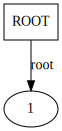

In [25]:
graph = visualize(sen)
graph

In [26]:
fl_graph = graphviz.Source(fl.to_dot())
fl_graph